# House Price Prediction Case Study 

## Assignment Part-I

### Business Case
**A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.**

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
* Which variables are significant in predicting the price of a house, and
* How well those variables describe the price of a house.
* Also, determine the optimal value of lambda for ridge and lasso regression.

Mainly Case Study Data Analysis include below steps:
1. Data Understanding and Exploration
2. Data Cleaning
3. Data Preparation
4. Model building and Evaluation

#### 1. Data Understanding and Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading dataset
data = pd.read_csv("train.csv")

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**data include 1460 rows and 79 columns. Few columns contains missing information too.**
There are few columns though numeric but catgorical in nature as below - 
MSSubClass, OverallQual, OverallCond, MasVnrArea, YearBuilt, YearRemodAdd, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, MoSold, YrSold
So we will not consider above columns as numeric.


In [5]:
# Collect all numeric columns except the above one
data_n = data.select_dtypes(include=['int64', 'float64'])
data_n.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [6]:
data_n = data_n.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'MasVnrArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold'], axis=1)

In [7]:
data_n.head()

,Id,LotFrontage,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,65.0,8450,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,208500
1,2,80.0,9600,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,181500
2,3,68.0,11250,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,223500
3,4,60.0,9550,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,140000
4,5,84.0,14260,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,250000


In [8]:
data_n.describe()

,Id,LotFrontage,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,421.610009,24.284752,9981.264932,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,59.000000,7553.500000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,730.500000,69.000000,9478.500000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,1460.000000,313.000000,215245.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


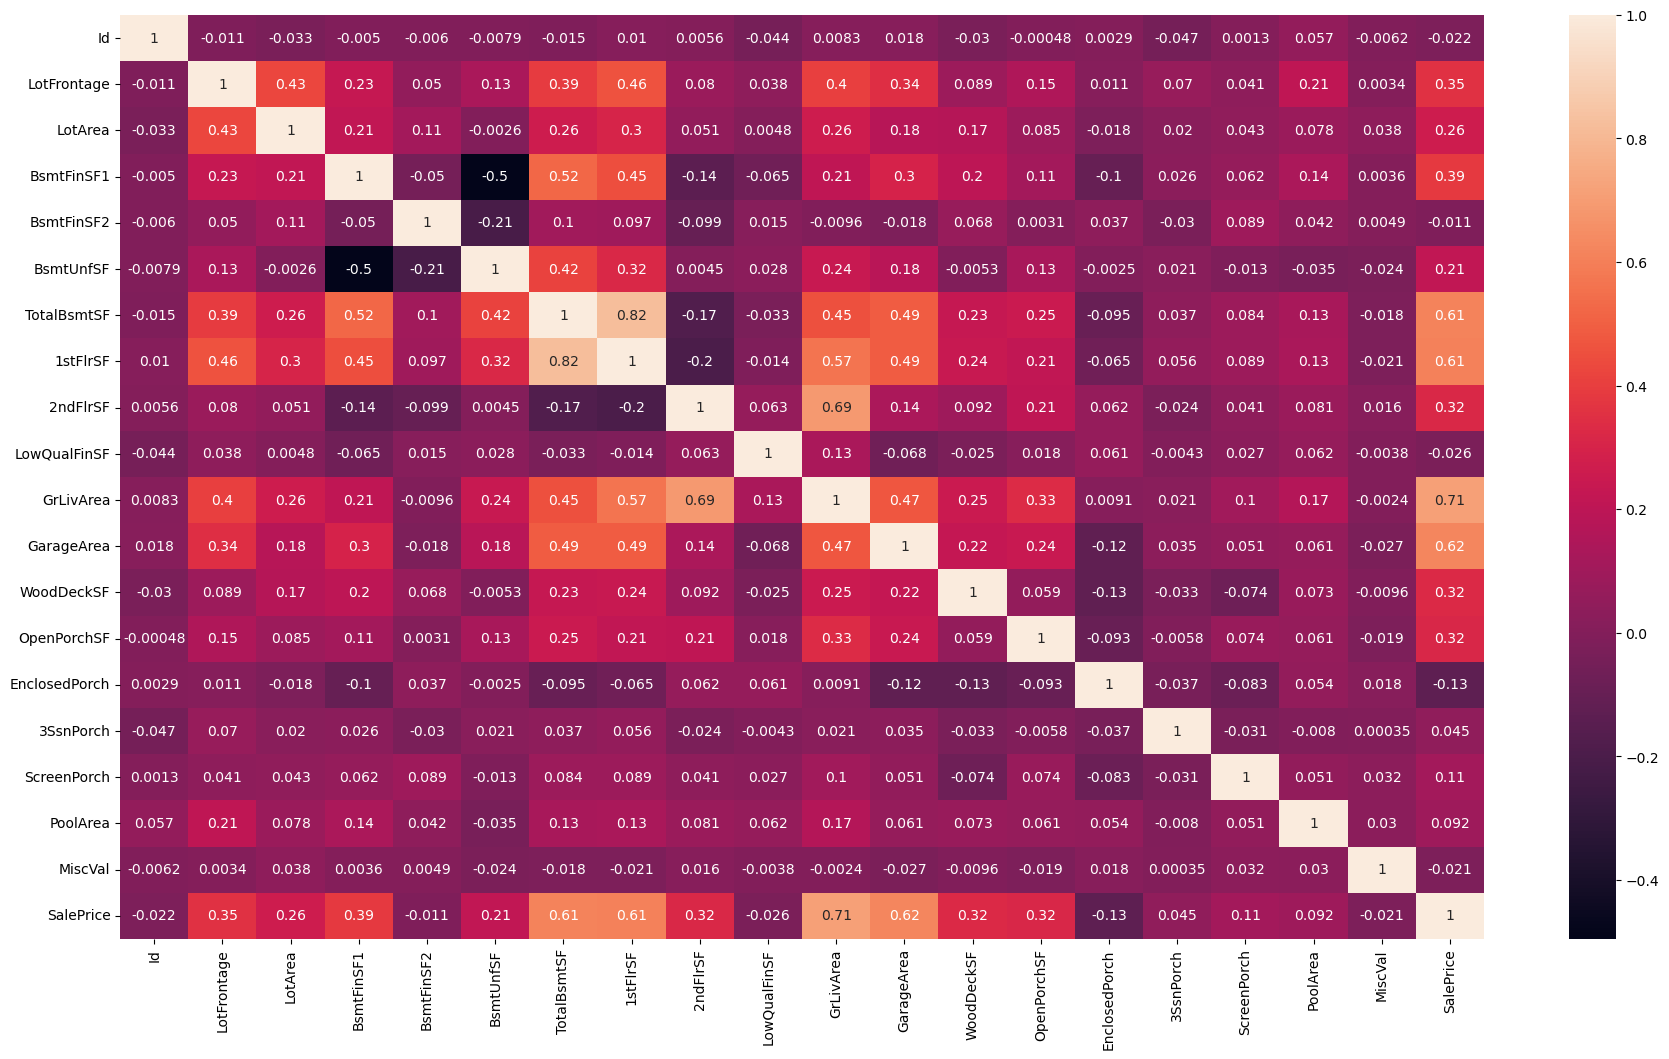

In [9]:
#Check correlation among numeric predictors using heatmap
data_correlation_mat = data_n.corr()
plt.figure(figsize=(22,12))
sns.heatmap(data_correlation_mat, annot=True)
plt.show()

### From the heatmap, there are few observations
SalePrice highly correlated with the below independent variables:
1. TotalBsmtSF - Total square feet of basement area
2. 1stFlrSF - First Floor square feet 
3. GarageArea - Size of garage in square feet
4. GrLivArea - Above grade (ground) living area square feet

There are few independent variables which are highly correleated to each other:
1. BsmtFinSF1, TotalBsmtSF, BsmtUnfSF
2. TotalBsmtSF, 1stFlrSF, BsmtFinSF1
3. 1stFlrSF, TotalBsmtSF, GrLivArea
4. 2ndFlrSF, GrLivArea
So multicolliniarity is also a factor that we need to consider while building the mode.


## Data Cleaning
As observer earlier that there are few columns with missing values so lets clean/correct the data

In [10]:
round(100*(data.isnull().sum())/len(data.index), 2) #check in percentage of missing values accross columns

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

In [11]:
#Check for columns where null values exist
check = round(100*(data.isnull().sum())/len(data.index), 2)
cols = check[check > 0].index
list(cols)
round(100*(data[cols].isnull().sum())/len(data.index), 2)

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

### for null data, we can replace it as per Data Dictionary given for the columns

In [12]:
#Alley: NA 	No alley access. So replace by NA
data['Alley'].fillna('NA', inplace=True)

In [13]:
#PoolQC: NA	No Pool. So replace NA
data['PoolQC'].fillna('NA', inplace=True)

In [14]:
#LotFrontage: Linear feet of street connected to property
data['LotFrontage'].fillna(0, inplace=True)

In [15]:
#MasVnrType: Masonry veneer type
data['MasVnrType'].fillna('None', inplace=True)

In [16]:
#MasVnrArea: Masonry veneer area in square feet
data['MasVnrArea'].fillna(0, inplace=True)

In [17]:
#Fence: Fence quality
data['Fence'].fillna('NA', inplace=True)

In [18]:
#FireplaceQu: Fireplace quality
data['FireplaceQu'].fillna('NA', inplace=True)

In [19]:
#GarageType: Garage location
data['GarageType'].fillna('NA', inplace=True)

In [20]:
#GarageFinish: Interior finish of the garage
data['GarageFinish'].fillna('NA', inplace=True)

In [21]:
#GarageQual: Garage quality
data['GarageQual'].fillna('NA', inplace=True)

In [22]:
#GarageCond: Garage condition
data['GarageCond'].fillna('NA', inplace=True)

In [23]:
#MiscFeature  - has   96.30% null values so we can drop it
data=data.drop('MiscFeature', axis=1)

In [24]:
#Check for columns where null values exist
check = round(100*(data.isnull().sum())/len(data.index), 2)
cols = check[check > 0].index
list(cols)
round(100*(data[cols].isnull().sum())/len(data.index), 2)

BsmtQual        2.53
BsmtCond        2.53
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtFinType2    2.60
Electrical      0.07
GarageYrBlt     5.55
dtype: float64

In [25]:
#BsmtQual: Evaluates the height of the basement
data['BsmtQual'].fillna('NA', inplace=True)

In [26]:
#BsmtCond: Evaluates the general condition of the basement
data['BsmtCond'].fillna('NA', inplace=True)

In [27]:
#BsmtExposure: Refers to walkout or garden level walls
data['BsmtExposure'].fillna('NA', inplace=True)

In [28]:
#BsmtFinSF1: Type 1 finished square feet
data['BsmtFinSF1'].fillna(0, inplace=True)

In [29]:
#BsmtFinType2: Rating of basement finished area (if multiple types)
data['BsmtFinType2'].fillna('NA', inplace=True)

In [30]:
#For all columns where year present, we can find number of years from today to convert into numeric data
data['GarageYrBlt']=2023 - data['GarageYrBlt']
data['YearBuilt']=2023 - data['YearBuilt']
data['YearRemodAdd']=2023 - data['YearRemodAdd']
data['YrSold']=2023 - data['YrSold']

In [31]:
#For below list of columns, declare as numeric but actually consider as category type and that is why above we have removed from numric type list 
# So we need to convert them into catgory type
# 'MSSubClass', 'OverallQual', 'OverallCond', 'MasVnrArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
#'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold'
data['MSSubClass']=data['MSSubClass'].astype('object')
data['OverallQual']=data['OverallQual'].astype('object')
data['OverallCond']=data['OverallCond'].astype('object')
data['MasVnrArea']=data['MasVnrArea'].astype('object')
data['YearBuilt']=data['YearBuilt'].astype('object')
data['YearRemodAdd']=data['YearRemodAdd'].astype('object')
data['BsmtFullBath']=data['BsmtFullBath'].astype('object')
data['BsmtHalfBath']=data['BsmtHalfBath'].astype('object')
data['FullBath']=data['FullBath'].astype('object')
data['HalfBath']=data['HalfBath'].astype('object')
data['BedroomAbvGr']=data['BedroomAbvGr'].astype('object')
data['KitchenAbvGr']=data['KitchenAbvGr'].astype('object')
data['TotRmsAbvGrd']=data['TotRmsAbvGrd'].astype('object')
data['Fireplaces']=data['Fireplaces'].astype('object')
data['GarageYrBlt']=data['GarageYrBlt'].astype('object')
data['GarageCars']=data['GarageCars'].astype('object')
data['MoSold']=data['MoSold'].astype('object')
data['YrSold']=data['YrSold'].astype('object')

In [32]:
data_cleaned=data
#Drop id column as well from the final data
X=data_cleaned.drop(['Id'], axis=1)

## Data Preparation

In [33]:
#For categorical data below, we need to convert it into dummy variables.
data_cate=X.select_dtypes(include=['object'])
data_cate.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,2,TA,TA,Y,NA,NA,2,15,WD,Normal
1,20,RL,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,2,TA,TA,Y,NA,NA,5,16,WD,Normal
2,60,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,2,TA,TA,Y,NA,NA,9,15,WD,Normal
3,70,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,3,TA,TA,Y,NA,NA,2,17,WD,Abnorml
4,60,RL,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,3,TA,TA,Y,NA,NA,12,15,WD,Normal


In [34]:
data_dummy=pd.get_dummies(data_cate, drop_first=True)
data_dummy.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [35]:
#Drop categorical columns now as dummy columns added for them
X=X.drop(list(data_cate.columns), axis=1)

In [36]:
#concat dummy columns now
X=pd.concat([X,data_dummy], axis=1)

In [37]:
X.shape

(1460, 914)

In [38]:
y=X['SalePrice'] #Response variable in y

In [39]:
#Drop "SalePrice" in X
X=X.drop("SalePrice",1)

In [40]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=913)

In [41]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## Model Building and Evaluation
### Linear Regression

In [42]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [43]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

38175949596503.375
[ 2.23723580e+02  6.71120932e+03  1.32973769e+16  4.70320575e+15
  1.28824732e+16 -1.27902970e+16 -3.36558182e+15 -3.80035894e+15
 -4.23306129e+14  4.57476286e+15  1.77331250e+03  4.75500000e+02
  1.65737500e+03  3.08900000e+03 -9.70750000e+02  6.34125000e+02
 -9.14088750e+04  1.58937500e+03  4.28468750e+02 -1.84900000e+03
 -7.82250000e+02 -1.78375000e+03  1.13740000e+04  2.77287500e+03
 -1.59890625e+04 -1.66175000e+03 -2.20350000e+03 -8.00883330e+14
 -2.63100000e+03  1.71343750e+03 -2.25290625e+03 -2.25956347e+15
  8.49550000e+03  4.06762500e+03  1.72152500e+04  1.01975000e+04
  9.46789062e+02 -1.32862500e+03 -2.55487500e+03  4.91250000e+02
  6.23359375e+02  1.73300000e+03 -4.89250000e+02 -3.69250000e+02
 -1.53275000e+03  1.73892851e+14  4.34900000e+03 -1.23175000e+03
 -2.52900000e+03 -4.03593750e+02  1.80229688e+03 -3.85387500e+03
  2.05157812e+03  3.15050000e+03  8.17665625e+03  6.53875000e+03
  7.53900000e+03  1.12840938e+04  4.28550000e+03  6.91850000e+03
  5.20

In [44]:
from sklearn.metrics import r2_score, mean_squared_error

In [45]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9921296115884762
-1.071829256686045e+22
50218577888.828125
3.0211785562170244e+34
49185678.637441844
6.897667936568549e+31


### Ridge Regression

In [46]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [47]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [48]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 9.43656216e+02  3.01106118e+03  3.86059316e+03  5.17521174e+02
  6.98580766e+02  4.90756538e+03  5.76818149e+03  2.89462097e+03
 -6.30735518e+02  6.58982600e+03  3.05700898e+03  1.31164417e+03
  1.72611300e+03 -3.78809103e+02  7.54224215e+02  1.15265260e+03
  1.65801257e+03 -1.31557186e+01 -1.26817033e+03 -6.30421667e+01
  2.23532754e+01 -1.52282409e+01  1.12182785e+03  4.96427691e+02
 -3.78007731e+02 -2.54732405e+02 -2.04969572e+02 -6.84763529e+02
 -8.49228324e+02 -1.04237248e+03 -5.79891462e+02 -7.76815675e+02
  6.15141530e+02 -5.45607076e+01  1.23140103e+03 -9.81931660e+02
  5.26926670e+02  5.77442690e+02  2.68906254e+02  2.26178145e+02
 -1.11302504e+02 -2.37710516e+02  2.72254651e+02  4.28061735e+02
  4.49194812e+02 -2.42959146e+02  1.84718753e+03 -7.24681454e+02
 -1.09503595e+02 -6.77693655e+02  7.32027128e+02 -8.24624124e+01
  1.03036821e+02 -4.34424164e+02 -3.21083648e+01  5.99920106e+02
 -7.55769905e+02  2.50067087e+03 -1.85323617e+03 -9.21209000e+02
 -7.77426444e+02 -1.17598

In [49]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9608638472505944
0.8465995514987155
249716002864.28363
432391766351.9297
244579826.50762352
987195813.5888805


In [50]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.071396,0.022158,0.012006,0.001678,0.0001,{'alpha': 0.0001},-46964.827293,-55368.352545,-54808.726787,-50255.504148,...,-51668.296792,3104.700351,28,-2438.507612,-2348.999148,-2624.971294,-2932.274464,-2485.827988,-2566.116101,203.669222
1,0.061200,0.004489,0.014499,0.001618,0.001,{'alpha': 0.001},-46620.041413,-55059.448446,-54697.652426,-49778.412616,...,-51363.015313,3171.280279,27,-2440.791307,-2351.145114,-2626.099686,-2937.084760,-2487.954146,-2568.615003,204.554479
2,0.059799,0.004070,0.015404,0.002872,0.01,{'alpha': 0.01},-44755.054268,-52958.047973,-53682.837957,-47999.860874,...,-49552.417012,3331.388024,26,-2465.548050,-2374.583811,-2642.837158,-2960.557993,-2511.240765,-2590.953555,204.056798
3,0.053202,0.005384,0.012001,0.002607,0.05,{'alpha': 0.05},-41925.410367,-49420.591398,-50389.258347,-44353.379564,...,-45920.029792,3359.770342,25,-2533.089184,-2441.709400,-2721.157417,-3019.866122,-2600.113597,-2663.187144,200.268114
4,0.054800,0.004486,0.013398,0.002869,0.1,{'alpha': 0.1},-39886.997054,-47209.694554,-47643.277683,-41654.409910,...,-43428.855502,3314.402762,24,-2578.639724,-2493.707954,-2792.800175,-3078.307025,-2674.473864,-2723.585749,203.412364
5,0.054201,0.003540,0.013999,0.001668,0.2,{'alpha': 0.2},-37315.405144,-44326.056290,-43917.806562,-38389.069447,...,-40465.884963,3013.361982,23,-2642.608139,-2565.250596,-2888.676329,-3164.059027,-2769.521117,-2806.023041,210.252003
6,0.048406,0.003012,0.010995,0.000886,0.3,{'alpha': 0.3},-35637.026801,-42401.412096,-41666.639986,-36297.165803,...,-38594.073284,2849.565626,22,-2693.418105,-2626.401792,-2955.837206,-3225.617256,-2834.520744,-2867.159021,212.401192
7,0.049597,0.001853,0.010800,0.002714,0.4,{'alpha': 0.4},-34449.365731,-40977.708151,-40095.326433,-34709.333552,...,-37227.136657,2760.415454,21,-2739.056491,-2676.240482,-3006.663820,-3274.885840,-2883.520668,-2916.073460,213.010557
8,0.051799,0.003062,0.010803,0.000749,0.5,{'alpha': 0.5},-33529.273992,-39878.292794,-38895.180921,-33578.053049,...,-36199.128220,2682.490968,20,-2779.745299,-2718.055352,-3047.668599,-3317.173629,-2924.520270,-2957.432630,213.313670
9,0.052193,0.003968,0.013806,0.003488,0.6,{'alpha': 0.6},-32785.067943,-38977.244540,-37938.740744,-32745.964990,...,-35384.036091,2606.967915,19,-2815.906625,-2756.774340,-3082.935691,-3353.156879,-2960.085394,-2993.771786,212.624752


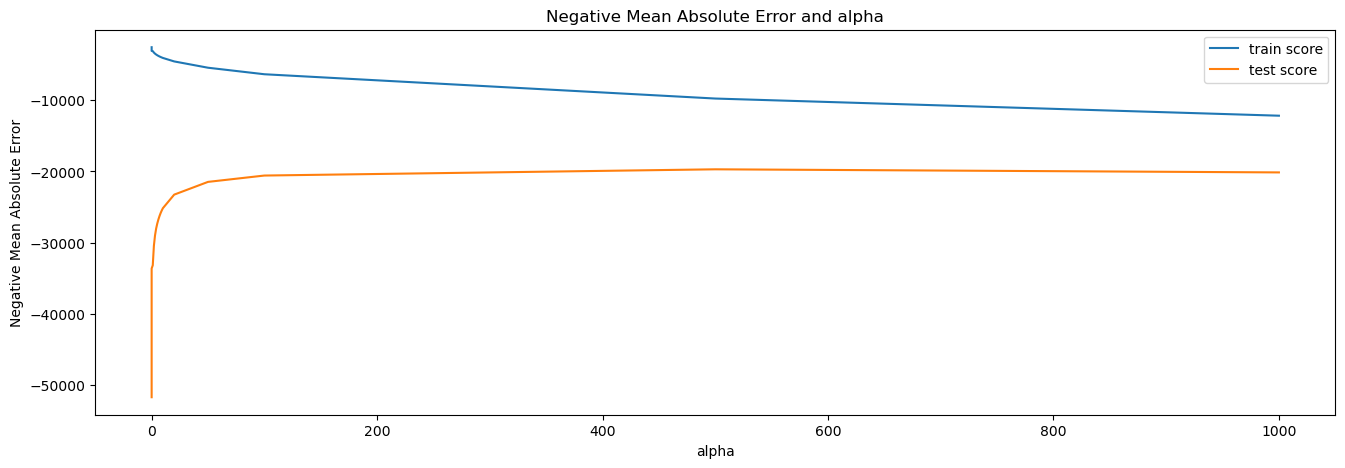

In [51]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [52]:
#lets predict the R-squared value of test and train data
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9608638472505944


### Lasso Regression

In [53]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [54]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 1000}


In [55]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =1000

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=1000)

In [56]:
lasso.coef_

array([ 0.00000000e+00,  3.76589769e+03,  7.40206810e+03,  0.00000000e+00,
       -0.00000000e+00,  8.59431064e+03,  2.03403401e+03,  0.00000000e+00,
       -1.78784562e+03,  2.64231796e+04,  3.73856559e+03,  0.00000000e+00,
        1.95899052e+00, -0.00000000e+00,  2.98879186e+02,  0.00000000e+00,
        1.50457908e+03,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  1.80059173e+03, -0.00000000e+00,
       -8.06851792e+02,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -3.05226068e+02,
        0.00000000e+00,  0.00000000e+00,  7.15324768e+02, -8.14894671e+02,
        9.06740922e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  1.58671066e+03, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -

In [57]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9520094705388219
0.878992054557311
306213113719.20825
341086612091.25525
299914900.80235875
778736557.2859709


In [58]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.921296e-01,9.608638e-01,9.520095e-01
1,R2 Score (Test),-1.071829e+22,8.465996e-01,8.789921e-01
2,RSS (Train),5.021858e+10,2.497160e+11,3.062131e+11
3,RSS (Test),3.021179e+34,4.323918e+11,3.410866e+11
4,MSE (Train),7.013250e+03,1.563905e+04,1.731805e+04
5,MSE (Test),8.305220e+15,3.141967e+04,2.790585e+04


In [59]:
# cv results
cv_results1 = pd.DataFrame(model_cv.cv_results_)
cv_results1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.475391,0.040618,0.013019,0.003336,0.0001,{'alpha': 0.0001},-38323.960190,-45013.537647,-44453.856523,-38514.483925,...,-40838.945085,3191.423455,28,-2646.236317,-2605.482834,-2944.759088,-3220.313504,-2804.674830,-2844.293315,223.298544
1,0.430588,0.035523,0.011645,0.001028,0.001,{'alpha': 0.001},-38322.492647,-45011.074342,-44449.901092,-38511.375416,...,-40836.388115,3190.898094,27,-2646.258066,-2605.516957,-2944.793651,-3220.347587,-2804.706419,-2844.324536,223.300855
2,0.425593,0.017166,0.010398,0.002578,0.01,{'alpha': 0.01},-38307.814266,-44986.451354,-44410.361528,-38480.304281,...,-40810.819677,3185.663519,26,-2646.475761,-2605.859648,-2945.140703,-3220.688037,-2805.023726,-2844.637575,223.323572
3,0.394443,0.014867,0.011597,0.000800,0.05,{'alpha': 0.05},-38242.362093,-44877.154882,-44234.369569,-38342.569808,...,-40697.047459,3162.688893,25,-2647.466763,-2607.415113,-2946.758130,-3222.217458,-2806.468198,-2846.065132,223.424579
4,0.504793,0.061064,0.013994,0.000632,0.1,{'alpha': 0.1},-38159.828783,-44738.644531,-44014.083163,-38169.914869,...,-40554.176913,3134.036710,24,-2648.818681,-2609.443606,-2948.816634,-3224.146984,-2808.398402,-2847.924862,223.517855
5,0.396612,0.010306,0.011179,0.000784,0.2,{'alpha': 0.2},-37974.336142,-44438.494806,-43607.494086,-37826.650788,...,-40291.570264,3060.191510,23,-2651.835815,-2613.670779,-2953.112235,-3228.109824,-2812.389875,-2851.823705,223.659388
6,0.407970,0.028265,0.010826,0.001470,0.3,{'alpha': 0.3},-37728.865119,-44149.165729,-43260.466768,-37484.951056,...,-40025.036974,3018.871723,22,-2655.253348,-2618.298602,-2957.660976,-3232.285481,-2816.779579,-2856.055597,223.725330
7,0.398791,0.018336,0.011423,0.001350,0.4,{'alpha': 0.4},-37479.063409,-43857.246986,-42925.970337,-37206.591827,...,-39776.951340,2967.382971,21,-2658.950526,-2623.148494,-2962.365620,-3236.601164,-2821.319950,-2860.477151,223.750616
8,0.401018,0.034370,0.010572,0.001375,0.5,{'alpha': 0.5},-37228.653675,-43580.571828,-42599.792422,-36942.363593,...,-39533.052166,2923.489663,20,-2662.870295,-2628.247193,-2967.323783,-3241.491862,-2825.971744,-2865.180975,223.896239
9,0.537430,0.153452,0.014982,0.003599,0.6,{'alpha': 0.6},-36980.510679,-43322.077023,-42280.864702,-36680.125207,...,-39295.743776,2886.277116,19,-2667.453364,-2633.961965,-2972.493248,-3246.529555,-2830.781977,-2870.244022,223.855409


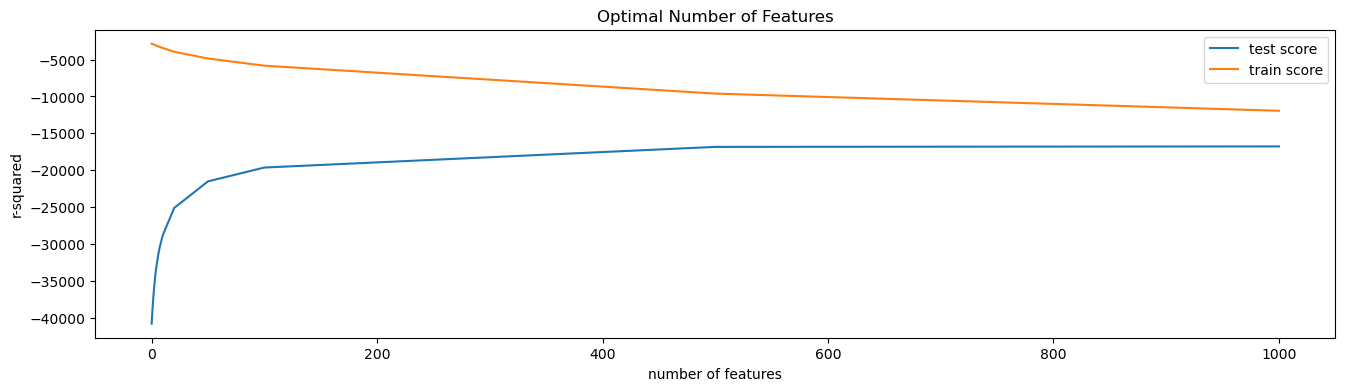

In [60]:
# plotting cv results
plt.figure(figsize=(16,4))

plt.plot(cv_results1["param_alpha"], cv_results1["mean_test_score"])
plt.plot(cv_results1["param_alpha"], cv_results1["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [61]:
#lets predict the R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9520094705388219


#### Observation of coefficients after regularization

In [62]:
betas = pd.DataFrame(index=X.columns)

In [63]:
betas.rows = X.columns

In [64]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [65]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
LotFrontage,2.237236e+02,943.656216,0.000000
LotArea,6.711209e+03,3011.061179,3765.897693
BsmtFinSF1,1.329738e+16,3860.593158,7402.068104
BsmtFinSF2,4.703206e+15,517.521174,0.000000
BsmtUnfSF,1.288247e+16,698.580766,-0.000000
TotalBsmtSF,-1.279030e+16,4907.565384,8594.310640
1stFlrSF,-3.365582e+15,5768.181490,2034.034014
2ndFlrSF,-3.800359e+15,2894.620968,0.000000
LowQualFinSF,-4.233061e+14,-630.735518,-1787.845620
GrLivArea,4.574763e+15,6589.826002,26423.179600


In [67]:
## View the top 5 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:20]

GrLivArea               26423.179600
OverallQual_9           12419.596904
OverallQual_10          11454.647506
TotalBsmtSF              8594.310640
OverallQual_8            7863.866889
BsmtFinSF1               7402.068104
GarageCars_3             5226.956847
SaleType_New             4131.093477
KitchenAbvGr_1           3975.906291
MasVnrArea_1170.0        3929.810829
LotArea                  3765.897693
GarageArea               3738.565589
FullBath_3               3694.254193
Neighborhood_Crawfor     3203.707939
OverallQual_7            3132.137141
Functional_Typ           2872.489557
BsmtExposure_Gd          2721.207933
MasVnrArea_304.0         2575.787386
BsmtFinType1_GLQ         2549.956099
MasVnrArea_424.0         2388.861589
Name: Lasso, dtype: float64